In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os, os.path
from random import sample

In [4]:
# Checking the sample of images I managed to upload - I had issues with Google Drive syncing a large number of files. This sample is reasonable enough.
# An alternative to test this might be to upload the files to Git and downloading from there (although you might need a public repo for that). 

list = os.listdir('/content/gdrive/My Drive/DAS Summative/das_images/das_images')
number_files = len(list)
print(number_files)

15057


In [0]:
# List of full paths to sample and load into memory

img_filename_list_fullpath = []
for root, dirs, files in os.walk('/content/gdrive/My Drive/DAS Summative/das_images/das_images'):
    for file in files:
        if file.endswith('.jpg'):
            file_full = '/content/gdrive/My Drive/DAS Summative/das_images/das_images/' + file
            img_filename_list_fullpath.append(file_full)

In [0]:
# List of filenames only

img_filename_list = []
for root, dirs, files in os.walk('/content/gdrive/My Drive/DAS Summative/das_images/das_images'):
    for file in files:
        if file.endswith('.jpg'):
            img_filename_list.append(file)

In [8]:
display(len(img_filename_list_fullpath))
img_filename_list_fullpath[0]

15056

'/content/gdrive/My Drive/DAS Summative/das_images/das_images/0014_10752956.jpg'

In [0]:
# Set directory to get code
os.chdir('/content/gdrive/My Drive/DAS Summative/')

In [10]:
# Check we have what we need
list = os.listdir('/content/gdrive/My Drive/DAS Summative')
print(list)

['das_images', 'matrix.py', 'FINd_gg.py', '__pycache__', 'FINd_numba_gg.py']


In [11]:
# Install imagehash
!pip install ImageHash

     |████████████████████████████████| 296kB 9.2MB/s 


In [12]:
# Typical preamble

%pylab inline

# %load_ext memory_profiler

from FINd_gg import FINDHasher
from FINd_gg import benchmarking_basic

from FINd_numba_gg import FINDHasher_1
from FINd_numba_gg import benchmarking_basic_1

import imagehash
from PIL import Image

import time
import os
from random import sample
import numpy as np

import multiprocessing

import matplotlib.pyplot as plt

import itertools

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading Files into Google Collab Memory and Working That Way

In [0]:
find = FINDHasher()

In [0]:
sample_images_filenames = sample(img_filename_list_fullpath, 20)

In [0]:
imgs_in_mem_list = []

for i in range(len(sample_images_filenames)):
  imgs_in_mem_list.append(Image.open(sample_images_filenames[i]))

In [51]:
# RUn on with TPU hardware acceleration, original code - around 0.445 ms per image

%%timeit

hash_list = []

for i in range(len(imgs_in_mem_list)):
  temphash = find.fromImage(imgs_in_mem_list[i])
  hash_list.append(temphash)
  temphash = []

1 loop, best of 3: 8.9 s per loop


In [12]:
# To run on the default CPU hardware - 20 images - around 0.445ms per image

%%timeit

hash_list = []

for i in range(len(imgs_in_mem_list)):
  temphash = find.fromImage(imgs_in_mem_list[i])
  hash_list.append(temphash)
  temphash = []

1 loop, best of 3: 9.03 s per loop


In [15]:
# RUn on the default GPU hardware - 20 images, around 0.382 seconds per image

%%timeit

hash_list = []

for i in range(len(imgs_in_mem_list)):
  temphash = find.fromImage(imgs_in_mem_list[i])
  hash_list.append(temphash)
  temphash = []

1 loop, best of 3: 7.63 s per loop


In [16]:
# This output comes up as a pop up window in GOogle Colab.
# Shown in the workbook

%prun find.fromImage(imgs_in_mem_list[0])

Default Code On Google HardWare Comparison - Loading Files from Google Drive

In [14]:
# Google CPU hardware

# Image numbers to hash and result list
image_counts = [5, 10, 20, 40]
results = []

# Loop through the different numbers of hashes and store the %timeit results
for i in image_counts:
    result = %timeit -o rand_hashes = benchmarking_basic(i)
    results.append(result)

# Extract the mean run times from the %timeit object
mean_times = []
for i in range(0, len(results)):
    mean_times.append(np.mean(results[i].all_runs))



1 loop, best of 3: 3.3 s per loop
1 loop, best of 3: 7.41 s per loop
1 loop, best of 3: 14.4 s per loop
1 loop, best of 3: 27.5 s per loop


In [0]:
# plt.figure(1, figsize = (9,6))
# plt.plot(image_counts, mean_times)
# plt.suptitle('Growth in FINd Image Hashing Algorithm (Original Provided)', fontsize = 20)
# plt.title('Mean Time of Runs', fontsize = 14)
# plt.xlabel('Number of Images', fontsize = 14)
# plt.xticks(np.arange(0,60, 10))
# plt.ylabel('Time',  fontsize = 14)

# # plt.savefig('mean_times_gg_drive.png', bbox_inches = 'tight')
# plt.show()

1 loop, best of 3: 5.42 s per loop
1 loop, best of 3: 10.6 s per loop
1 loop, best of 3: 20.6 s per loop
1 loop, best of 3: 41.7 s per loop


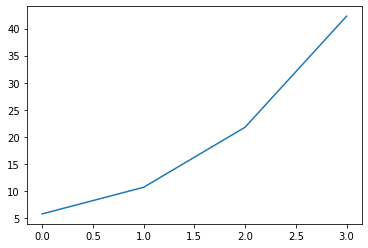

In [0]:
# Run on Google's Provided TPU Hardware

# Image numbers to hash and result list
image_counts = [5, 10, 20, 40]
results = []

# Loop through the different numbers of hashes and store the %timeit results
for i in image_counts:
    result = %timeit -o rand_hashes = benchmarking_basic(i)
    results.append(result)

# Extract the mean run times from the %timeit object
mean_times_TPU = []
for i in range(0, len(results)):
    mean_times_TPU.append(np.mean(results[i].all_runs))

# plt.plot(mean_times)

In [16]:
# Run on Google's Provided GPU Hardware

# Image numbers to hash and result list
image_counts = [5, 10, 20, 40]
results = []

# Loop through the different numbers of hashes and store the %timeit results
for i in image_counts:
    result = %timeit -o rand_hashes = benchmarking_basic(i)
    results.append(result)

# Extract the mean run times from the %timeit object
mean_times_GPU = []
for i in range(0, len(results)):
    mean_times_GPU.append(np.mean(results[i].all_runs))

# plt.plot(mean_times)

1 loop, best of 3: 3.62 s per loop
1 loop, best of 3: 7.04 s per loop
1 loop, best of 3: 14 s per loop
1 loop, best of 3: 27.5 s per loop


In [0]:
%prun test_output = benchmarking_basic(1)

Fastest Run of Code - Numba Optimisation on Google's GPUs

In [0]:
find_1 = FINDHasher_1()

In [15]:
# RUn on the default GPU hardware - 20 images, numba optimised code, around 0.22 seconds per image

%%timeit

hash_list = []

for i in range(len(imgs_in_mem_list)):
  temphash = find_1.fromImage(imgs_in_mem_list[i])
  hash_list.append(temphash)
  temphash = []

1 loop, best of 3: 4.4 s per loop


Multiprocess on Google CPUs - Note we only have 1 GPU, so cannot multiprocess there

In [11]:
# Google CPU multiprocessing comparison - run on the Google CPU (only 1 process)

# This was run on Google Colab

%%timeit 


test = benchmarking_basic_1(40)

1 loop, best of 3: 22.1 s per loop


In [10]:
# Multiprocessing on the Google CPU

# This was run on Google Colab

%%timeit

# split jobs
map_list = [20, 20]

with multiprocessing.Pool(2) as pool:
        test = pool.map(benchmarking_basic_1, map_list)

1 loop, best of 3: 12.5 s per loop
